# Clasification

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

(1000, 2) (1000,) (800, 2) (200, 2) (800,) (200,)


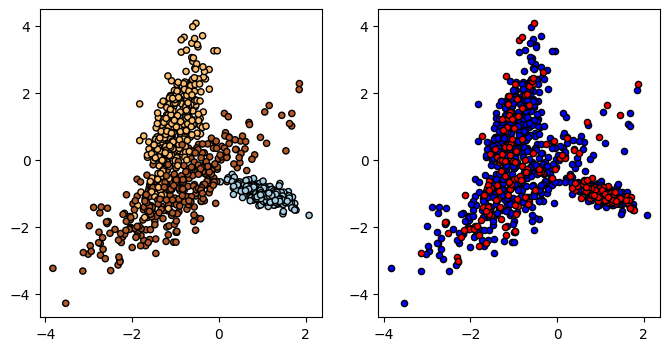

In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2, n_classes = 3,
                           n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)
print(X.shape, y.shape,X_train.shape, X_test.shape,y_train.shape, y_test.shape)
# Plot train / test data
_, axes = plt.subplots(1,2, figsize = (8,4))
axes[0].scatter(X[:,0], X[:,1], c = y, s=20, edgecolor = "k", cmap='Paired')
axes[1].scatter(X_train[:,0], X_train[:,1], c = 'b', s=20, edgecolor = "k")
axes[1].scatter(X_test[:,0],X_test[:,1], c = 'r', s=20, edgecolor = "k")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos la funcion
import sys
sys.path.append('/content/drive/MyDrive/Machine Learning/machine_learning/Tools/')
from fucboundaries import Boundaries

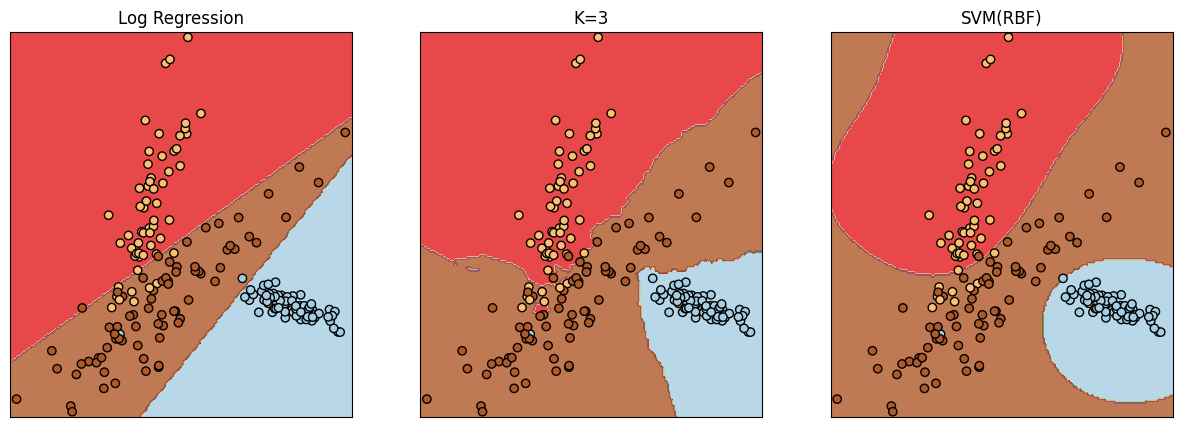

In [ ]:
models = [LogisticRegression(), kNN(n_neighbors=7), SVC(kernel='rbf')]
names = ['Log Regression', 'K=3', 'SVM(RBF)']

_, axes = plt.subplots(1, len(models), figsize = (5*len(models),5))
predictions = {}

# fit the models
for clf, name, ax in zip(models, names, axes) :
    #
    clf.fit( X_train , y_train )
    predictions[name] = clf.predict(X_test)
    # Plot everything
    #se le entrega el nombre funcion
    Boundaries(clf,X_test,y_test, ax = ax)
    ax.set_title(name)

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Log Regression -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.930  	   0.930  	   0.930  	   0.930  	
########----- Results for K=3 -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.935  	   0.935  	   0.935  	   0.935  	
########----- Results for SVM(RBF) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.940  	   0.940  	   0.940  	   0.940  	


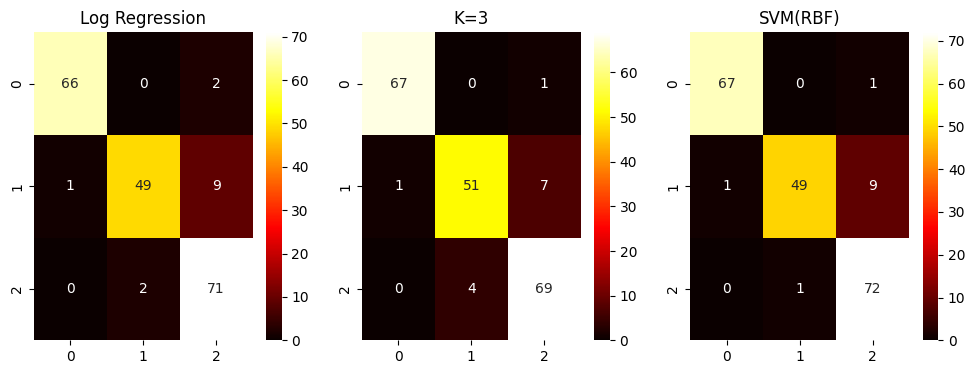

In [ ]:

_, axes = plt.subplots(1, len(models) , figsize = (4*len(models),4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes) :
  print ("########----- Results for {0} -----########".format( name ))
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title( name )


## En datos reales

In [10]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

(1797, 64)


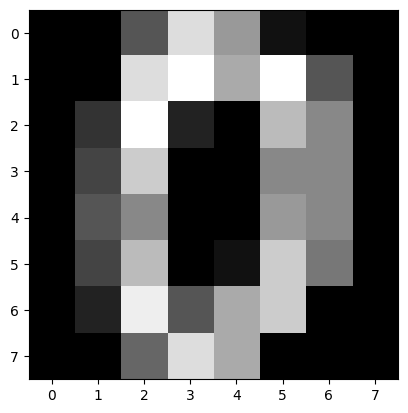

In [6]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

In [7]:
train_data, test_data, train_targets, test_targets = train_test_split(digits.data,digits.target)

In [19]:
models = [LogisticRegression(), kNN(n_neighbors=3), SVC(kernel='rbf')]
names = ['Log Regression', 'K=3', 'SVM(RBF)']
predictions = {}

# fit the models
for name, clf in zip(names,models) :
  #
  clf.fit( train_data , train_targets )
  predictions[name] = clf.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-------- Results for Log Regression --------
-- Acc --	0.944	
-- Prec --	0.944	
-- Rec --	0.944	
-- F1 -- 	0.944  	
-------- Results for K=3 --------
-- Acc --	0.989	
-- Prec --	0.989	
-- Rec --	0.989	
-- F1 -- 	0.989  	
-------- Results for SVM(RBF) --------
-- Acc --	0.984	
-- Prec --	0.984	
-- Rec --	0.984	
-- F1 -- 	0.984  	


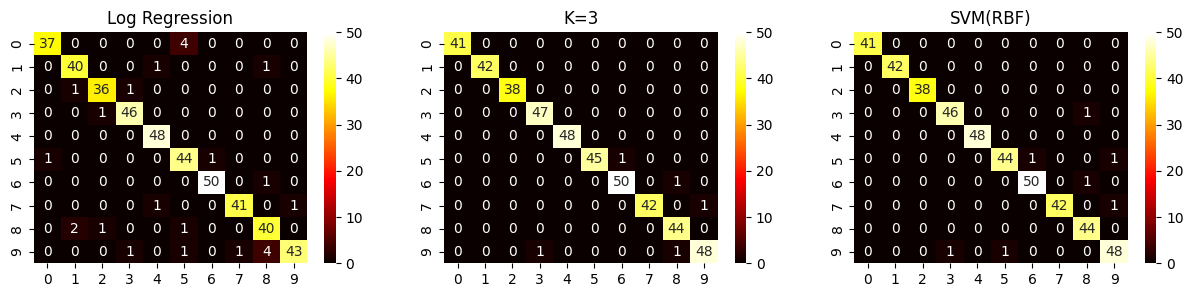

In [20]:
_, axes = plt.subplots(1, 3 , figsize = (15,3))

# Compute metrics - plot confusion matrix
for name, ax in zip(names,axes) :
  print ("-------- Results for {0} --------".format( name ))
  accuracy = accuracy_score( test_targets , predictions[name] )
  precision = precision_score( test_targets , predictions[name], average = "micro")
  recall = recall_score( test_targets , predictions[name] , average = "micro")
  f1 = f1_score( test_targets , predictions[name] , average = "micro")
  cm = confusion_matrix( test_targets , predictions[name] )
  ##--------------
  print("-- Acc --\t{0:.3f}\t".format(accuracy))
  print('-- Prec --\t{0:.3f}\t'.format(precision))
  print('-- Rec --\t{0:.3f}\t'.format(recall))
  print("-- F1 -- \t{0:.3f}  \t".format(f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title( name )

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

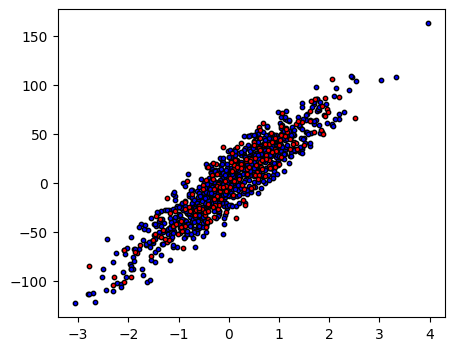

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 15 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# np.random.seed(0)
# y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X_train, y_train, c='b', edgecolors='k', s=10)
ax.scatter(X_test, y_test, c='r', edgecolor='k', s=10)

In [ ]:
# Train a linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

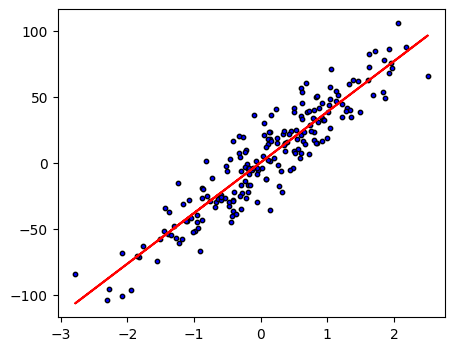

In [ ]:
predictions = linear_regression.predict(X_test)

_,ax = plt.subplots(figsize=(5,4))
ax.scatter(X_test,y_test, c='b', edgecolors='k', s=10)
ax.plot(X_test,predictions, c='r')


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE
mae= mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
#diferencia cuadrada
print ('MAE: {0:0.4f}'.format(mae))
#diferencia absoluta
print('MSE: {0:0.4f}'.format(mse))

MAE: 12.2933
MSE: 236.1130
